# **Case Study - Diamond Price Prediction**

### **Business Understanding**

Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon. However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for determining its price.

The value of diamonds depends upon their structure, cut, inclusions (impurity), carats, and many other features. The uses of diamonds are many, such as in industries, as they are effective in cutting, polishing, and drilling. Since diamonds are extremely valuable, they have been traded across different countries for centuries now and this trade only increases with time. They are graded and certified based on the "four Cs", which are color, cut, clarity, and carat. These are the only metrics that are being used to the quality of diamonds and sets the price of the diamond. This metric allows uniform understanding for people across the world to buy diamonds, which allows ease of trade and value for what is purchased.

### **Understanding the 4 C's**
- Cut
- Color
- Clarity
- Carat

<img style="float: left;" width="300" height="400" src="img/color_.jpg">
<img style="float: left;" width="300" height="400" src="img/clarity_.jpg">
<img width="300" height="400" src="img/carat_.jpg">


Credits - https://www.brides.com/story/choosing-engagement-ring-four-cs


### **Problem Statement**
**Build a system which can take features of diamond like carat, cut, color, clarity, x, y, z, etc.. and predicts the `price` of diamond.**

### **Case Study Agenda**

In this notebook, you will learn:
1. How to split the given data into Train and Test?
2. How to perform Feature Engineering on Categorical and Numerical Features?
    - Categorical Columns - OneHotEncoding and LabelEncoding
    - Numerical Columns - Standardization and Normalization
3. How to build ML models that can predict Price of a Diamond?

## **Import the required Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## **Step 1 - Load the Data**

In [2]:
df = pd.read_csv('data/diamonds.csv')

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Description
Kindly find the data description for the features below:

| Feature | Description |
| :---: | :--- | 
| **price** | price in US dollars `($ 326 - $ 18,823)` |
| **carat** | weight of the diamond `(0.2 - 5.01)` |
| **cut** | quality of the cut `(Fair, Good, Very Good, Premium, Ideal)` |
| **color** | diamond colour, `(J (worst) to D (best))` |
| **clarity** | a measurement of how clear the diamond is `(I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))` |
| **x** | length in mm `(0 - 10.74)` |
| **y** | width in mm `(0 - 58.9)` |
| **z** | depth in mm `(0 - 31.8)` |
| **depth** | total depth percentage = z / mean(x, y) = 2 * z / (x + y) `(43 - 79)` |
| **table** | width of top of diamond relative to widest point `(43 - 95)` |

## **Step 2 - Exploratory Data Analysis**

In [3]:
df.shape

(53940, 10)

In [4]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<Axes: title={'center': 'Clarity'}, xlabel='clarity', ylabel='count'>

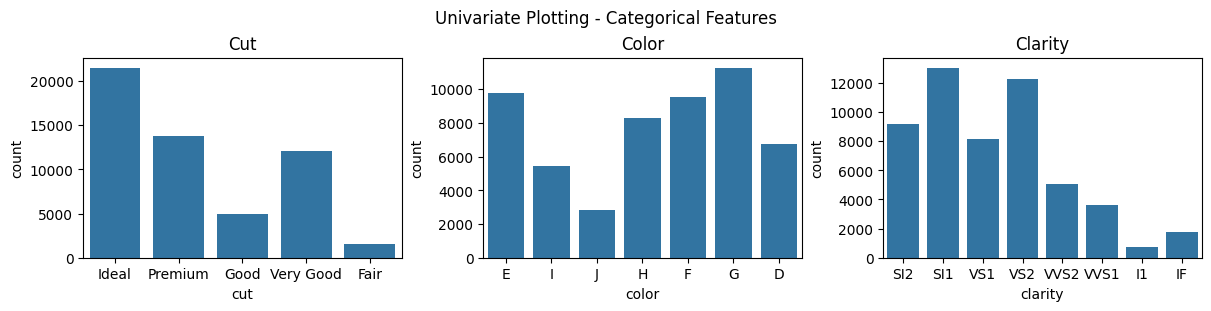

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features")

axs[0].set_title("Cut")
sns.countplot(data=df, x='cut', ax=axs[0])

axs[1].set_title("Color")
sns.countplot(data=df, x='color', ax=axs[1])

axs[2].set_title("Clarity")
sns.countplot(data=df, x='clarity', ax=axs[2])

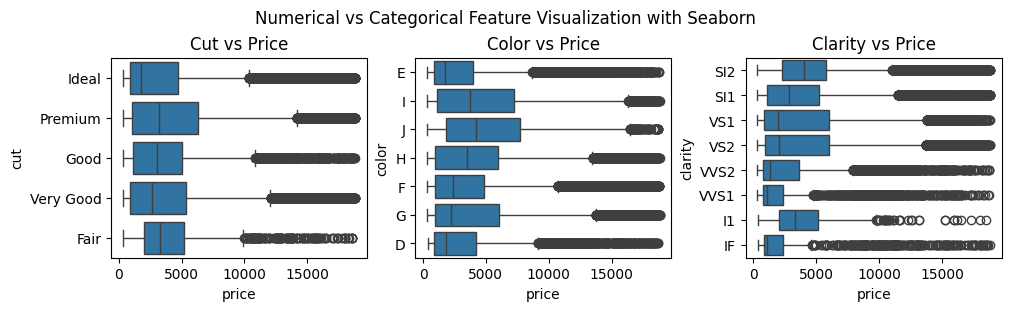

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title("Cut vs Price")
sns.boxplot(data=df, x='price', y='cut', ax=axs[0])

axs[1].set_title("Color vs Price")
sns.boxplot(data=df, x='price', y='color', ax=axs[1])

axs[2].set_title("Clarity vs Price")
sns.boxplot(data=df, x='price', y='clarity', ax=axs[2])

plt.show()

<Axes: title={'center': 'Table'}, xlabel='table', ylabel='Count'>

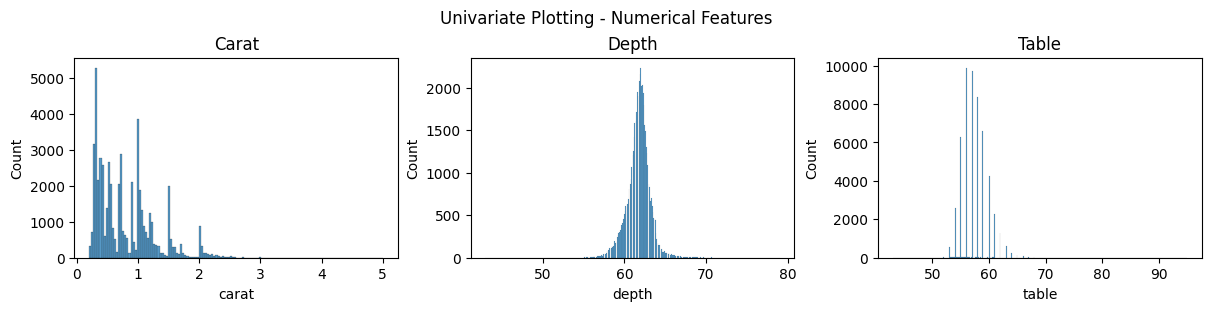

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Numerical Features")

axs[0].set_title("Carat")
sns.histplot(data=df, x='carat', ax=axs[0])

axs[1].set_title("Depth")
sns.histplot(data=df, x='depth', ax=axs[1])

axs[2].set_title("Table")
sns.histplot(data=df, x='table', ax=axs[2])

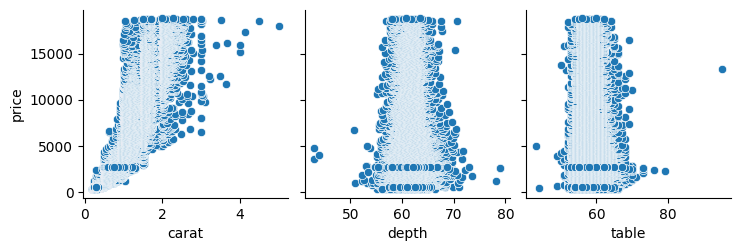

In [9]:
sns.pairplot(data=df,
           x_vars=['carat', 'depth', 'table'],
           y_vars='price')

<Axes: title={'center': 'Z'}, xlabel='z', ylabel='Count'>

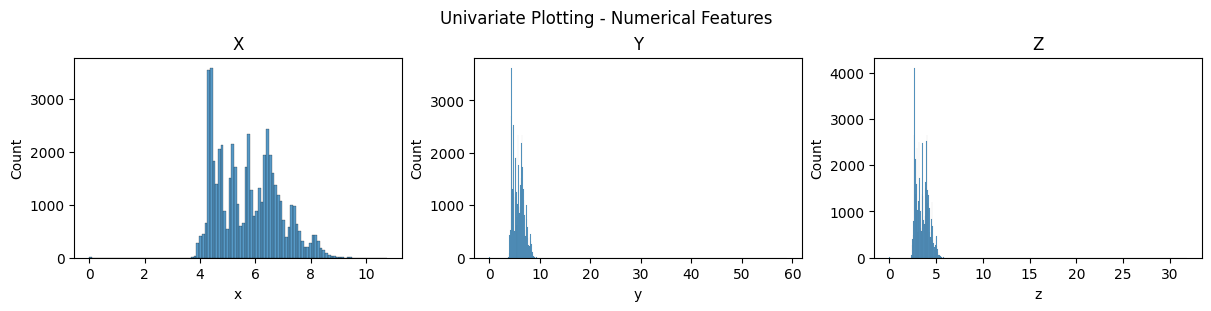

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Numerical Features")

axs[0].set_title("X")
sns.histplot(data=df, x='x', ax=axs[0])

axs[1].set_title("Y")
sns.histplot(data=df, x='y', ax=axs[1])

axs[2].set_title("Z")
sns.histplot(data=df, x='z', ax=axs[2])

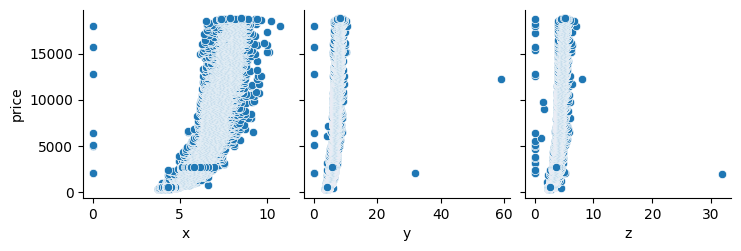

In [11]:
sns.pairplot(data=df,
           x_vars=['x', 'y', 'z'],
           y_vars='price')

## **Data Preparation and Model Building Pipeline**

1. Identifying the inputs (X) and output (y)
2. Split into train and test (X_train, X_test, y_train, y_test)
3. Data Preparation: Data Cleaning and Feature Engineering.
    - Clean the training data
    - Preprocess the training data (X_train_transformed)
4. Training Phase: Build a model
5. Preprocess the test data (X_test_transformed)
6. Predict on unseen data
7. Evaluate the model performance

**Installing sklearn Library**  
**`!pip install -U scikit-learn`**

In [12]:
import sklearn

print(sklearn.__version__)

1.3.2


## **Step 3 - Segregate Inputs (X) and Output (y)**

In [13]:
y = df.pop("price")
X = df

## **Step 4 - Split the data into Train and Test**

In [14]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40455, 9) (40455,)
(13485, 9) (13485,)


## **Step 5 - Apply Data Preparation on Training Data**

In [15]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

#### **Separate Numerical and Categorical Features**

In [16]:
# Separating Categorical and Numerical Columns

X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [17]:
X_train_cat.head()

,cut,color,clarity
441,Premium,H,SI2
50332,Very Good,D,SI1
35652,Ideal,G,VVS2
9439,Very Good,H,VS1
15824,Good,F,VS2


In [18]:
X_train_num.head()

,carat,depth,table,x,y,z
441,0.89,60.2,59.0,6.26,6.23,3.76
50332,0.70,64.0,53.0,5.57,5.61,3.58
35652,0.31,62.7,57.0,4.33,4.31,2.71
9439,0.90,62.3,59.0,6.12,6.17,3.83
15824,1.01,60.6,62.0,6.52,6.49,3.94


#### **Feature Engineering: Applying Standardization on Numerical Features**

In [19]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,carat,depth,table,x,y,z
441,0.194920,-1.085697,0.694368,0.472201,0.430971,0.312528
50332,-0.205679,1.567623,-1.997562,-0.142482,-0.107276,0.058918
35652,-1.027961,0.659908,-0.202942,-1.247129,-1.235860,-1.166861
9439,0.216004,0.380611,0.694368,0.347483,0.378883,0.411154
15824,0.447930,-0.806400,2.040332,0.703821,0.656688,0.566137


In [20]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Feature Names:", scaler.get_feature_names_out())
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 6
Feature Names: ['carat' 'depth' 'table' 'x' 'y' 'z']
Mean of each column: [ 0.79755135 61.75490051 57.45233469  5.72994018  5.73356989  3.53818267]
Std of each column: [0.47428986 1.43216771 2.22888453 1.1225301  1.15188634 0.7097527 ]


#### **Feature Engineering: Applying One-Hot Encoding on Categorical Features**

In [21]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (40455, 3)
Shape of Data after Transformation: (40455, 20)


,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
441,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50332,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35652,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9439,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15824,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
print("Applied encoding on:", encoder_.feature_names_in_)
print("Unique Categories:", encoder_.categories_)
print("Feature Names after encoding:", encoder_.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]
Feature Names after encoding: ['cut_Fair' 'cut_Good' 'cut_Ideal' 'cut_Premium' 'cut_Very Good' 'color_D'
 'color_E' 'color_F' 'color_G' 'color_H' 'color_I' 'color_J' 'clarity_I1'
 'clarity_IF' 'clarity_SI1' 'clarity_SI2' 'clarity_VS1' 'clarity_VS2'
 'clarity_VVS1' 'clarity_VVS2']


In [23]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (40455, 3)
Shape of Data after Transformation: (40455, 17)


,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
441,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50332,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35652,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9439,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15824,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
print("Applied encoding on:", encoder_.feature_names_in_)
print("Unique Categories:", encoder_.categories_)
print("Feature Names after encoding:", encoder_.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]
Feature Names after encoding: ['cut_Good' 'cut_Ideal' 'cut_Premium' 'cut_Very Good' 'color_E' 'color_F'
 'color_G' 'color_H' 'color_I' 'color_J' 'clarity_IF' 'clarity_SI1'
 'clarity_SI2' 'clarity_VS1' 'clarity_VS2' 'clarity_VVS1' 'clarity_VVS2']


In [25]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', min_frequency=3000, sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (40455, 3)
Shape of Data after Transformation: (40455, 15)


,cut_Ideal,cut_Premium,cut_Very Good,cut_infrequent_sklearn,color_E,color_F,color_G,color_H,color_I,color_infrequent_sklearn,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS2,clarity_infrequent_sklearn
441,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50332,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35652,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9439,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15824,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
print("Applied encoding on:", encoder_.feature_names_in_)
print("Unique Categories:", encoder_.categories_)
print("Infrequent Categories", encoder_.infrequent_categories_)
print("Feature Names after encoding:", encoder_.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]
Infrequent Categories [array(['Fair'], dtype=object), array(['J'], dtype=object), array(['I1', 'IF', 'VVS1'], dtype=object)]
Feature Names after encoding: ['cut_Ideal' 'cut_Premium' 'cut_Very Good' 'cut_infrequent_sklearn'
 'color_E' 'color_F' 'color_G' 'color_H' 'color_I'
 'color_infrequent_sklearn' 'clarity_SI2' 'clarity_VS1' 'clarity_VS2'
 'clarity_VVS2' 'clarity_infrequent_sklearn']


#### **Feature Engineering: Applying Label Encoding on Categorical Features**

As the three categorical features are ordinal, we will proceed with the Label Encoding instead of One-Hot Encoding

In [27]:
X_train_cat_transformed = pd.DataFrame(index=X_train_cat.index)

X_train_cat_transformed.head()

""
441
50332
35652
9439
15824


In [28]:
# Specify the order
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

# Apply Label Encoding
X_train_cat_transformed['cut'] = X_train_cat['cut'].map(cut_encoder)
X_train_cat_transformed['color'] = X_train_cat['color'].map(color_encoder)
X_train_cat_transformed['clarity'] = X_train_cat['clarity'].map(clarity_encoder)

X_train_cat_transformed.head()

,cut,color,clarity
441,5,3,2
50332,3,7,3
35652,4,4,6
9439,3,3,5
15824,2,5,4


#### **Concatenate `X_train_num_transformed` and `X_train_cat_transformed`**

In [29]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
441,0.194920,-1.085697,0.694368,0.472201,0.430971,0.312528,5,3,2
50332,-0.205679,1.567623,-1.997562,-0.142482,-0.107276,0.058918,3,7,3
35652,-1.027961,0.659908,-0.202942,-1.247129,-1.235860,-1.166861,4,4,6
9439,0.216004,0.380611,0.694368,0.347483,0.378883,0.411154,3,3,5
15824,0.447930,-0.806400,2.040332,0.703821,0.656688,0.566137,2,5,4


## **Step 7 - Apply Data Preparation on Test Data**

**Note that, Step-6 is discussed after this.**

In [30]:
# Separate Categorical and Numerical Features

X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [31]:
# Apply transformation on Numerical data

X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,carat,depth,table,x,y,z
10176,0.637687,0.171139,-1.100252,0.783997,0.795591,0.805657
16083,1.038286,0.590084,-0.651597,1.095792,1.038670,1.143803
13420,0.848529,-0.457279,0.245713,1.024525,0.925812,0.904283
20407,1.481053,-0.596928,-0.651597,1.514489,1.411971,1.355144
8909,0.216004,-0.038334,-0.202942,0.392025,0.413609,0.397064


In [32]:
# Apply transformation on Categorical data

X_test_cat_transformed = pd.DataFrame(index = X_test_cat.index)

X_test_cat_transformed['cut'] = X_test_cat['cut'].map(cut_encoder)
X_test_cat_transformed['color'] = X_test_cat['color'].map(color_encoder)
X_test_cat_transformed['clarity'] = X_test_cat['clarity'].map(clarity_encoder)

X_test_cat_transformed.head()

,cut,color,clarity
10176,4,3,2
16083,4,3,3
13420,5,2,3
20407,4,5,3
8909,3,5,4


In [33]:
# Concatinate X_test_num_transformed and X_test_cat_transformed

X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
10176,0.637687,0.171139,-1.100252,0.783997,0.795591,0.805657,4,3,2
16083,1.038286,0.590084,-0.651597,1.095792,1.038670,1.143803,4,3,3
13420,0.848529,-0.457279,0.245713,1.024525,0.925812,0.904283,5,2,3
20407,1.481053,-0.596928,-0.651597,1.514489,1.411971,1.355144,4,5,3
8909,0.216004,-0.038334,-0.202942,0.392025,0.413609,0.397064,3,5,4


## **Step 6, 8 and 9 - Training and Testing Phase (Linear Regression)**

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

806.1710207181831

In [35]:
output_df = pd.DataFrame({'Actual': y_test})

In [36]:
output_df['Linear Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions
10176,4733,5068.656613
16083,6424,7209.240007
13420,5510,6130.750051
20407,8770,9851.316033
8909,4493,4768.121502
...,...,...
52283,2494,3350.954062
10789,4861,4399.620579
1190,2932,3885.028850
3583,3422,4128.870138


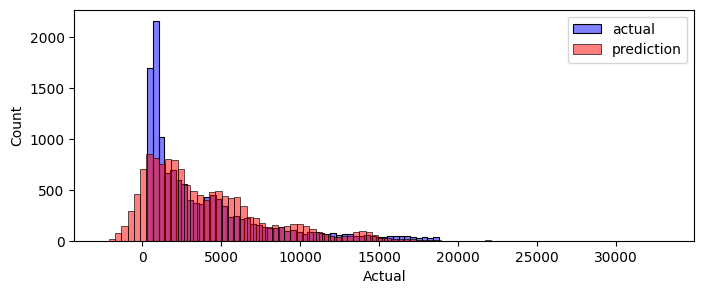

In [37]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Linear Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

## **Step 6, 8 and 9 - Training and Testing Phase (KNN Regression)**

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

383.2470745272525

In [39]:
output_df['KNN Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions
10176,4733,5068.656613,4664.4
16083,6424,7209.240007,6278.2
13420,5510,6130.750051,5180.8
20407,8770,9851.316033,12080.0
8909,4493,4768.121502,6015.2
...,...,...,...
52283,2494,3350.954062,2445.2
10789,4861,4399.620579,4301.8
1190,2932,3885.028850,3569.6
3583,3422,4128.870138,3228.2


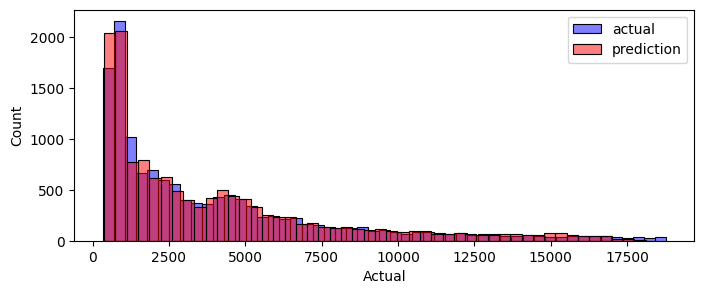

In [40]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

## **Step 6, 8 and 9 - Training and Testing Phase (DT Regression)**

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

359.1343344456804

In [42]:
output_df['DT Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions
10176,4733,5068.656613,4664.4,4620.0
16083,6424,7209.240007,6278.2,6946.0
13420,5510,6130.750051,5180.8,5098.0
20407,8770,9851.316033,12080.0,12477.0
8909,4493,4768.121502,6015.2,4678.0
...,...,...,...,...
52283,2494,3350.954062,2445.2,2442.0
10789,4861,4399.620579,4301.8,4166.0
1190,2932,3885.028850,3569.6,3120.5
3583,3422,4128.870138,3228.2,2852.0


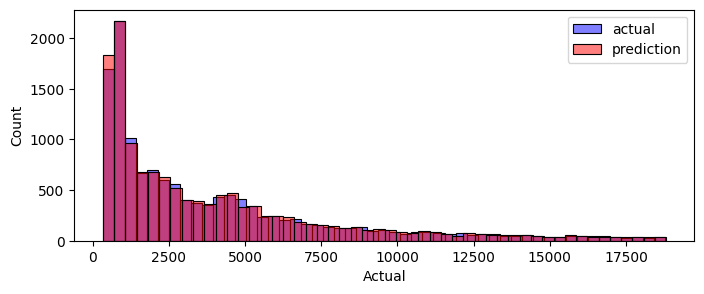

In [43]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['DT Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

## **Step 6, 8 and 9 - Training and Testing Phase (Random Forest Regression)**

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

269.59147794433557

In [45]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions,RF Regression Predictions
10176,4733,5068.656613,4664.4,4620.0,4701.600000
16083,6424,7209.240007,6278.2,6946.0,7159.360000
13420,5510,6130.750051,5180.8,5098.0,5236.060000
20407,8770,9851.316033,12080.0,12477.0,11399.370000
8909,4493,4768.121502,6015.2,4678.0,4873.930000
...,...,...,...,...,...
52283,2494,3350.954062,2445.2,2442.0,2423.030000
10789,4861,4399.620579,4301.8,4166.0,4422.230000
1190,2932,3885.028850,3569.6,3120.5,3031.508357
3583,3422,4128.870138,3228.2,2852.0,2904.390000


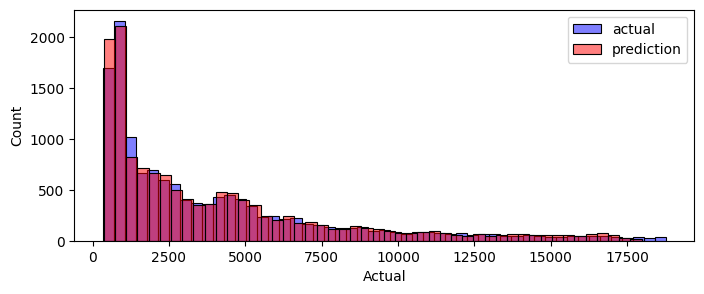

In [46]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['RF Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

## **Comparing all the Models**

In [47]:
df_melted = pd.melt(output_df,  var_name='Model', value_name='Prediction')

df_melted.head()

,Model,Prediction
0,Actual,4733.0
1,Actual,6424.0
2,Actual,5510.0
3,Actual,8770.0
4,Actual,4493.0


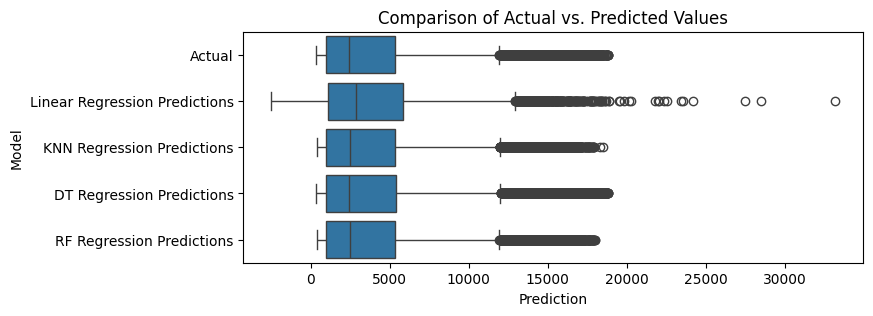

In [48]:
fig, ax = plt.subplots(figsize=(8,3))

sns.boxplot(x='Prediction', y='Model', data=df_melted)
plt.title('Comparison of Actual vs. Predicted Values')

plt.show()